# Übung zu Optimierung


### Ziel der Übung

Ein einfaches Klassifizierungsproblem aus dem Machine Learning mit gegebenen Daten lösen. 

Dazu müssen Sie 

1. Den Gradienten sowie auch die Hesse Matrix einer vorgegebenen Funktion ("Loss Function") von Hand berechnen und sich davon überzeugen, dass die Funktion konvex sein muss.

2. Die Berechnung des Gradienten numerisch implementieren und mit einer numerischen Approximation vergleichen.

3. Das Gradient Descent Verfahren mit konstanter Schrittweite für die Minimierung der gegebenen Loss Function implementieren und das Verfahren auf das MNIST Dataset anwenden.

4. Gradient Descent Verfahren mit Line Search für dieselbe Problemstellung implementieren, auf denselben Datensatz anwenden und die Unterschiede diskutieren. Als Line Search Algorithmen sollen Newton und Backtracking implementiert werden.

5. Das Gradient Descent Verfahren mit konstanter Schrittweite verwenden, um einen Klassifikator für das Erkennen von Katzen aus Bildern zu trainieren.  

### Rahmenbedingungen / Abgabe

Die Studierenden sollen die Lösungen selbständig erarbeiten. Die Lösungen sind in folgender Form abzugeben:
* ein __PDF__ mit den Berechnungen des Gradienten und der Hesse Matrix (allenfalls handgeschrieben, gescannt) 
* ein __Jupyter Notebook__ mit den implementierten Funktionen gemäss Vorlage. Als Vorlage nehmen Sie dieses Notebook. Verändern Sie den Namen zu `Optimization_Exercise_<lastname>_<firstname>.ipynb`.

Für die Implementierung soll soll nur auf Numpy und nicht auf Funktionalität von "higher level libraries" zurückgegriffen werden. 


### Abgabetermin: 30. April 19

Bitte senden Sie Ihre Lösungen gut dokumentiert per Email an [Martin Melchior](mailto:martin.melchior@fhnw.ch).


# Teil 1: Zu Optimierende Funktion und Gradient (12 Punkte)

Die zu optimierende Funktion, im Folgenden "Loss Function" genannt, sei gegeben durch 

$$ 
\begin{eqnarray}
L(\mathbf{\boldsymbol{\theta}};\mathbf{x},y) & = & -y  \log\left[\hat{y}(\boldsymbol{\theta};\mathbf{x})\right] - (1 - y)  \log \left[1 - \hat{y}(\boldsymbol{\theta};\mathbf{x})\right], \\
\hat{y}(\boldsymbol{\theta};\mathbf{x}) & = & \frac{1}{1+e^{-z(\boldsymbol{\theta};\mathbf{x})}},\\
z(\boldsymbol{\theta};\mathbf{x}) &=&  \boldsymbol{\theta}^T \mathbf{x},
\end{eqnarray}
$$

wobei $\boldsymbol{\theta}$ und $\mathbf{x}$ n-dimensionale Vektoren und $y$, $\hat{y}$ und $z$ skalare Werte sind. 
Diese Funktion soll verstanden werden als Funktion von $\boldsymbol{\theta}$ - die Grössen $\boldsymbol{x}$ und $y$  sollen als konstant betrachtet werden. 
Die Funktionen $\hat{y}$ und $z$ könnten auch direkt in $L$ ausgeschrieben werden, wurden aber eingeführt, um die Funktion interpretierbarer zu gestalten und Ihre Berechnungen in den folgenden Übungen zu vereinfachen.

*Hinweis*: __Halten Sie bei den Berechnungen die einzelnen Schritte detailiert fest und kommentieren Sie diese!__

### Übung 1.1 : Formel für den Gradienten (2)

Zeigen Sie, dass die partiellen Ableitungen von $L$ durch folgenden Ausdruck gegeben sind:

$$\frac{\partial L}{\partial \theta_i} = \left[ \hat{y}(\boldsymbol{\theta};\mathbf{x})-y\right] x_i$$

Zeigen Sie ausserdem, dass sich alle partiellen Ableitungen zusammen als folgenden Gradientenvektor schreiben lassen:

$$\nabla_\boldsymbol{\theta} L = \left[ \hat{y}(\boldsymbol{\theta};\mathbf{x})-y\right] \mathbf{x}$$

*Hinweis*: Benutzen Sie die Kettenregel

### Übung 1.2 : Hesse-Matrix und Konvexität (2)

Berechnen Sie die Hesse-Matrix der Funktion $L$ und zeigen Sie, dass

$$
H = \hat{y}(\boldsymbol{\theta};\mathbf{x})\, (1-\hat{y}(\boldsymbol{\theta};\mathbf{x})) \, \mathbf{x} \mathbf{x}^T.
$$

(Der Ausdruck $\mathbf{x} \mathbf{x}^T$ ist eine Matrix mit Komponenten $(\mathbf{x} \mathbf{x}^T)_{ij}=x_i x_j$)

Zeigen sie schliesslich, dass die Funktion $L$ konvex ist. Ist sie strikt konvex?

### Übung 1.3 : Implementierung in _numpy_ (4)

Implementieren Sie die obige Loss Function und deren Gradienten in *numpy*.

*Hinweis*: Implementieren Sie alle oben eingeführten Hilfsfunktionen und benutzen Sie `np.dot()` für das Matrixprodukt.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def z( theta, x ):
    """
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    x -- data point (np.array with shape (n,?))
    
    Returns:
    z -- scalar value
    """
    # EXERCISE START
    return theta.T.dot(x)
    
    # EXERCISE STOP


def yhat( theta, x ):
    """
    Computes the scores for the logistic regression model 
    (sigmoid function) for given parameter vector and data point. 
    
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    x -- data point (np.array with shape (n,?))
    
    Returns:
    yhat -- scalar value
    """
    # EXERCISE START
    zval = z(theta,x)
    return 1/(1+np.exp(-zval))
    
    # EXERCISE STOP

    
def L( theta, x, y ):
    """
    Computes the cross-entropy loss for the scores of the logistic 
    regression model for given parameter vector and data point.
    
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    x -- data point (np.array with shape (n,))
    y -- single number (float)
    
    Returns:
    f -- scalar value
    """
    # EXERCISE START
    yhatval = yhat(theta,x)
    return -y*(np.log(yhatval))-(1-y)*(np.log(1-yhatval))
    
    
    # EXERCISE STOP

    
def gradient_L( theta, x, y ):
    """
    Computes the gradient of the loss w.r.t. the parameters (theta)
    for given parameter vector and data point.

    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    x -- data point (np.array with shape (n,))
    y -- single number, 'label' (float)
    
    Returns:
    gradient -- gradient of L at position theta: np.array with shape (n,)
    """
    # EXERCISE START
    yhatval = yhat(theta,x)
    return (yhatval-y)*(x)
    # EXERCISE STOP

#### Validierung

Sie können Ihre Implementierung mit folgenden Beispielvektoren testen - falls Sie einen Fehler gemacht haben, wird eine Exception geworfen.

In [36]:
theta = np.array([0.1,0.2,0.3])
x = np.array([0.6,0.7,0.8])
y = 1

np.testing.assert_array_almost_equal(L( theta, x, y ), 0.49715445033211, decimal=8)
np.testing.assert_array_almost_equal(gradient_L( theta, x, y ), np.array([-0.23504458, -0.27421868, -0.31339278]), decimal=8)

### Übung 1.4 : Numerische Berechnung des Gradienten (4)

Implementieren Sie eine Funktion `numerical_gradient_L`, die den numerischen Gradientenvektor mittels einer genügend kleinen Schrittweite $\varepsilon$ approximiert. Verwenden Sie dazu die Formel

$$
\frac{\partial L(\boldsymbol{\theta};\mathbf{x},y)}{\partial\theta_i} \approx \frac{L(\boldsymbol{\theta}+\varepsilon \mathbf{e_i};\mathbf{x},y) - L(\boldsymbol{\theta}-\varepsilon \mathbf{e_i};\mathbf{x},y)}{2\varepsilon}.
$$

wobei $\mathbf{e_i}$ einen Einheitsvektor in die $i$-te Koordinaten-Richtung bezeichnet. Die Funktion soll die gleichen Argumente besitzen wie die oben implementierte Gradientenfunktion plus zusätzlich einen Parameter `eps`.

Berechnen Sie dazu die Norm der Abweichung des numerisch approximierten Gradientenvektors vom analytisch berechneten Gradientenvektor relativ zur Norm des exakten Gradienten. Werten Sie diese Abweichung aus für 
* Zufällig generierte Werte für $y$ im Intervall $[0,1]$
* Zufällig generierte Werte für $x_i$ und $\theta_i$ im Intervall $[-2,2]$
* Werte für $\epsilon$ variierend zwischen $10^{-14}$ und $10^{1}$

Für welche Werte von `eps` ist die numerische Approximation brauchbar? Eine vernünftige relative Abweichung sollte maximal etwa $10^{-8}$ betragen liegen. Benutzen Sie `matplotlib` um eine Abschätzung von guten Grössen für `eps` zu geben. 

Versuchen Sie die Ergebnisse zu interpretieren.

In [37]:
# Einheitsvektor in die i-te Koordinatenrichtung
def one_hot_vector( i, n ):
    vec = np.zeros(n)
    vec[i] = 1
    return vec

def numerical_gradient_L( theta, x, y, eps=1e-5 ):
    """
    Computes the numerical approximation of the gradient 
    of the function 'L' for given model parameters and 
    data points and discretization parameter.
    
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    x -- data point (np.array with shape (n,))
    y -- single number (float), label
    eps -- discretization parameter (float)
    
    Returns:
    gradient -- numerical gradient at position theta: np.array with shape (n,)
    """
    # EXERCISE START
    numgrad = np.zeros((len(theta)))
    for i in range(len(theta)):
        ei = one_hot_vector(i, len(theta) )
        numgrad[i] = (L( theta+eps*(ei), x, y )-L( theta-eps*(ei), x, y ) )/(2*eps)
    
    return numgrad
    
    
    
    # EXERCISE STOP

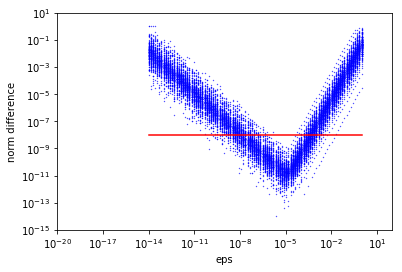

In [38]:
# Vergleich mit dem analytisch berechneten Gradientenvektor

# epsilon values
n_eps = 100
eps_values = 10**np.linspace( -14, 0, n_eps )

# parameters and data points 
n_points = 300
x = np.random.uniform( -2, 2, [n_points,3] )
theta = np.random.uniform( -2, 2, [n_points,3] )
y = np.random.uniform( 0, 1, n_points )

# initialize vectors for the results
diffs = np.zeros([n_points*n_eps,2])
numgrads = np.zeros([n_points*n_eps,2])
grads = np.zeros([n_points*n_eps,2])

# compute the gradients and the differences

# EXERCISE START
counter = 0
for i in range( n_points ):
    xvec = x[i,:]
    thetavec = theta[i,:]
    yval = y[i]
    for j in range( n_eps ):
        #print('thetavec')
        #print(thetavec)
        eps = eps_values[j]
        numgradL = numerical_gradient_L( thetavec, xvec, yval, eps)
        #print('numgradL')
        #print(numgradL)
        normnumgradL = np.linalg.norm(numgradL)
        #print(normnumgradL)
        # numgrads
        gradL = gradient_L( thetavec, xvec, yval )
        #print('gradL')
        #print(gradL)
        normgradL = np.linalg.norm(gradL)
        #print(normgradL)
        diffs[counter,0] = eps
        diffs[counter,1] = (normgradL-normnumgradL)/normgradL
        counter += 1
        #print('--------')
# EXERCISE STOP


fig = plt.figure()
ax = plt.gca()
ax.scatter( diffs[:,0], diffs[:,1], c="blue", s=0.1 )
ax.plot( eps_values, [1e-8]*n_eps , c="red")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("eps")
ax.set_ylabel("norm difference")
ax.set_xlim([1e-20,1e2])
ax.set_ylim([1e-15,10])
plt.show()


# Teil 2: Gradient Descent Verfahren (10 Punkte)

Die oben eingeführte Loss Function ist die sog. *Cross Entropy Loss Function* für das im Unterricht vorgestellte Perzeptron. Ein Perzeptron kann als *Klassifikator* interpretiert werden. Ein *Binärer Klassifikator* versucht zu einem gegebenen Input (z.B. ein Bild) vorherzusagen, zu welcher Klasse (eine aus zwei) der Input gehört. 

Ein Klassifikator wird trainiert, indem für ein Set von $m$ Datenpunkten $\mathbf{x}^{(i)} \in \mathbb{R}^n$ und ein Set von $m$ dazugehörigen Klassen-Labels $y^{(i)} \in \{0,1\}$ durch Optimierung ein Parametervektor $\boldsymbol{\theta}$ gesucht wird, bei welchem die Labels aus den Datenpunkten mit möglichst kleinem Fehler resultieren. Als Mass dafür wird die Kostenfunktion verwendet, welche dem Mittelwert der Werte der bei den Datenpunkten ausgewerteten Loss Function entspricht. 

In unserem Setting lautet die Kostenfunktion

$$
C(\boldsymbol{\theta};\mathbf{x}^{(1)},y^{(1)},\dots,\mathbf{x}^{(m)},y^{(m)})=\frac{1}{m} \sum_{i=1}^m L(\mathbf{\boldsymbol{\theta}};\mathbf{x}^{(i)},y^{(i)})
$$

Wir laden dazu die Datenpunkte $\mathbf{x}^{(i)}$ in eine 2d Array-Struktur mit den einzelnen Datenpunkten als Zeilenvektoren in eine Matrix $\mathbf{X}$ gestapelt - ähnlich wie bei der Design-Matrix, die wir im Rahmen der linearen Regression behandelt haben:

$$ \mathbf{X} = \begin{bmatrix} x^{(1)}_1 & \dots & x^{(1)}_n \\ \vdots & \vdots & \vdots \\ x^{(m)}_1 & \dots & x^{(m)}_n \end{bmatrix}, $$ 

Entsprechend packen wir die Labels in einen Vektor $\mathbf{y}$:

$$ \mathbf{y} = \begin{bmatrix} y^{(1)}\\ \vdots \\ y^{(m)}\end{bmatrix}, $$ 

Wir verwenden dann für die Kostenfunktion die kompaktere Notation: $C(\boldsymbol{\theta};\mathbf{X},\mathbf{y}).$

#### Laden der Daten

Als Daten verwenden wir ein im Machine-Learning häufig verwendeter Test-Datensatz bestehend aus digitalisierten, handgeschriebenen Ziffern. Im Speziellen verwenden wir eine reduzierte Version davon, bestehend aus 1797 8x8 Pixel Bildern. Die in $X$ enthaltenen Vektoren (Datenpunkte) sind 65 dimensionale Vektoren (8x8+1=65). Eine zusätzliche Dimension wurde mit Wert konstant auf 1 gesetzt hinzugefügt (bei Index 0), um einen Bias modellieren. Die restlichen 8x8=64 Elemente entsprechen den Graustufenwerten (auf [0,1] normiert) für die einzelnen Pixel. 

Die Labelwerte sind auf '1' (`true`) gesetzt, falls die handgeschriebene Ziffer eine 1 ist und in allen anderen Fällen auf '0' (`false`).  

In [39]:
# Das Datenfile muss im selben Ordner liegen wie das jupyter Notebook. 
data = np.load( "vana_data.npz" )
X0 = data['X']
y0 = data['y']
print(X0.shape,y0.shape)

(1797, 65) (1797,)


Sie können über die Zeilen von $\mathbf{X}$ auf die einzelnen Datenpunkte zugreifen. In numpy: `x_i = X0[i,:]`. 
Falls wir den Bias (Index 0) wegschneiden und den Array auf 8x8 reshapen, so können wir allenfalls die Ziffer erkennen (im Beispiel unten die 0):

In [40]:
X0[0,1:].reshape(8,8)

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

Die 2d Arrays können auch als Bild geplottet werden. Wir geben hierfür im Titel auch gleich das im Datenset gefundene Label an: 

Text(0.5,1,'Label: 0')

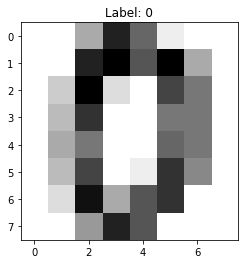

In [41]:
item = 0
plt.imshow( X0[item,1:].reshape(8,8), cmap="binary" )
plt.title( "Label: " + str( y0[item] )) 

Text(0.5,1,'Label: 1')

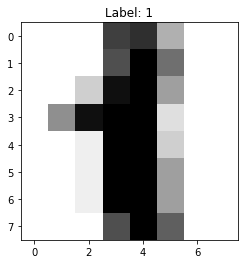

In [42]:
item = 1
plt.imshow( X0[item,1:].reshape(8,8), cmap="binary" )
plt.title( "Label: " + str( y0[item] )) 

#### Aufteilung in Trainings- und Testdaten

Wie im Machine-Learning üblich, spalten wir die Daten auf in ein Training- und ein Test-Datenset. Das Trainings-Datenset wird verwendet um die Parameter des Modells zu bestimmen, d.h. die Kostenfunktion wird definiert auf den Elementen des Trainings-Datensets und die Parameter bestimmt durch Minimierung dieser so definierten Kostenfunktion.

Das Test-Datenset wird anschliessend verwendet (in Übung 3.5), um zu testen, ob das Modell auch vernünftige Vorhersagen machen kann auf Daten, welche nicht fürs Training verwendet worden sind.    

In [43]:
# split in train and test
index = np.arange(X0.shape[0])
np.random.shuffle(index)

train_ratio = 0.8
ind_max = int(0.8 * X0.shape[0])-1
X = X0[0:ind_max,:]
y = y0[0:ind_max]
Xtest = X0[ind_max:,:]
ytest = y0[ind_max:]
print(X.shape,y.shape, Xtest.shape,ytest.shape)

(1436, 65) (1436,) (361, 65) (361,)


### Übung 2.1 : Implementierung der Kostenfunktion (4)

Für einen Schritt im Gradient Descent Verfahren interessiert uns der über den ganzen Datensatz $(\mathbf{X}, \mathbf{y})$ gemittelten Gradient

$$
\nabla C(\mathbf{\boldsymbol{\theta}};\mathbf{X},\mathbf{y}) = \frac{1}{m} \sum_{i=1}^m \nabla L(\mathbf{\boldsymbol{\theta}};\mathbf{x}^{(i)},y^{(i)}).
$$

Implementieren Sie eine Funktion für die Kostenfunktion $C$, sowie auch eine Funktion für deren Gradienten $\nabla C$.

In [44]:
# Berechnung der Kostenfunktion
def cost( theta, X, y ):
    """
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    
    Returns:
    mean_f -- single number: mean value of the function f for a given theta on all the datapoints in X
    """
    # EXERCISE START
    m = len(y)
    
    Lvec = 0
    for i in range(m):
        x = X[i,:]
        Lvec += L( theta, x, y[i] )
    
    mean_f = 1/m*Lvec
    
    return mean_f
    
    # EXERCISE STOP

def cost_gradient( theta, X, y ):
    """
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    
    Returns:
    mean_gradient -- mean gradient: np.array with shape (n,)
    """
    # EXERCISE START
    m = len(y)
    
    gradLvec = []
    for i in range(m):
        x = X[i,:]
        gradLvec.append(gradient_L( theta, x, y[i] ))
    gradLvec = np.array(gradLvec)
    # print(gradLvec)
    
    mean_gradient = 1/m*np.sum(gradLvec,axis=0)
    
    return mean_gradient
    
    
    
    
    # EXERCISE STOP

In [45]:
# Testing the algorithm
theta = np.zeros(X.shape[1])
gradC = cost_gradient( theta, X, y )
print(gradC.shape)
print(X.shape)

(65,)
(1436, 65)


### Übung 2.2 : Implementierung des Gradient Descent Verfahrens mit konstanter Schrittweite (4)

Implementieren Sie nun auf Basis der oben geleisteten Vorarbeiten das Gradient Descent Verfahren mit einer fixen Schrittweite (`alpha`) angewandt auf die Kostenfunktion $C$:

$$
\boldsymbol{\theta}^{(n+1)} \to \boldsymbol{\theta}^{(n)} - \alpha \nabla C\left(\mathbf{\boldsymbol{\theta}}^{(n)};\mathbf{X},\mathbf{y}\right)
$$

Das Verfahren soll erlauben, einen geeigneten Startwert (`theta_init`) zu setzen. Als Abbruchkriterium können Sie das Erreichen einer gewissen Anzahl Iterationen (`n_iter`) benutzen. Speichern Sie die Parametervektoren aller Iterationen und geben Sie sie am Schluss als Liste zurück; dann können Sie später die Entwicklung des Funktionswertes abhängig von $\mathbf{\theta}$ untersuchen.

Wenden Sie schliesslich das Verfahren an - mittels einem von uns vorgegebenen Startwert für den Parameter-Vektor und erstellen Sie einen Plot mit dem Verlauf der Kostenfunktion als Funktion der Anzahl Iterationen.

In [46]:
def gradient_descent( X, y, theta_init, n_iter, alpha ):
    """
    Arguments:
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    theta_init -- initial parameter vector (np.array with shape (n,))
    n_iter -- maximum number of iterations (int)
    alpha -- step size (float)
    
    Returns:
    theta0 -- the final parameter vector of the iteration (np.array with shape (n,))
    theta_history -- list with the parameter vectors of all the iterations (list with length n_iter+1)
    """
    # EXERCISE START
    theta_history = np.zeros((n_iter+1,len(theta_init)))
    theta_history[0]=theta_init
    
    for i in range(1,n_iter+1):
        theta_history[i] = theta_history[i-1] - alpha*cost_gradient( theta_history[i-1], X, y )
    
    theta0 = theta_history[n_iter]
    
    return theta0,theta_history
    
    
    # EXERCISE STOP

### Übung 2.3 : Anwendung des Verfahrens (2)

Wenden Sie nun das Verfahren auf den vorgegebenen Datensatz an - etwa mit max. 300 Iterationen und einer Lernrate `alpha=1`. Als Startwert soll das unten definierte `theta_init` verwendet werden. 

Berechnen Sie dann für die Parameter bei jeder Iteration (in der Liste `theta_history`) den Wert der Kostenfunktion  $C$ und plotten Sie den Verlauf dieser Werte. Die Werte sollten immer kleiner werden, um schliesslich den minimalen Wert der Funktion zu erreichen.

In [47]:
# Konstruktion des Initialwertes:
np.random.seed(0)
theta_init = np.random.rand( X.shape[1] ) * 0.1

# EXERCISE START
n_iter = 300
alpha = 1

theta_fr, theta_history = gradient_descent( X, y, theta_init, n_iter, alpha )

c = []
for theta in theta_history:
    c.append(cost( theta, X, y ))

# EXERCISE STOP

0.06530556599942205


Text(0,0.5,'Cost Function (fixed rate)')

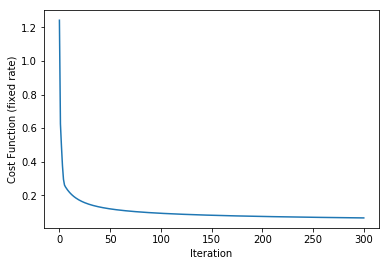

In [48]:
# Graphische Darstellung der Kostenfunktion

# EXERCISE START
print(c[-1])
plt.plot(c)
plt.xlabel('Iteration')
plt.ylabel('Cost Function (fixed rate)')



# EXERCISE STOP

# Teil 3: Gradient Descent mit Line Search (12 Punkte)

Bis jetzt haben Sie die Schrittweite konstant gehalten. Im Unterricht haben Sie auch Methoden kennengelernt, in welchen die Schrittweite angepasst werden:
* Line-Search mit dem Newton-Verfahren
* Line Search mit Backtracking

Bei beiden Verfahren liegt folgende Struktur zu Grunde:
1. Startwert setzen : $\theta^{(0)}$.
2. Iterationsschritt ausführen:
    1. Berechne negativen Gradienten (Abstiegsrichtung): $a^{(k+1)} = -\nabla C(\theta^{(k)})$
    2. Berechne die Schrittweite $t^{(k+1)}$ als Minimum der Funktion $g(t) = C(\theta^{(k)}+t\cdot a^{(k+1)}))$ mittels Newton oder Backtracking.
    3. Abbruch-Kriterium testen: 
        * Schrittlänge $\lVert t^{(k+1)}\cdot a^{(k+1)}\rVert<\epsilon$ und den zuletzt erreichten Wert ($\theta^{(k)}$) zurückgeben, falls erfüllt.
        * Falls maximale Anzahl Iterationen erreicht, den Wert $\theta^{(k)}$ mit Warnung zurückgeben.
    4. Update : $\theta^{(k+1)} = \theta^{(k)} + t^{(k+1)}\cdot a^{(k+1)}$

### Übung 3.1 : Line Search mit Newton-Verfahren (10)

Implementieren Sie nun Gradient Descent mit Line Search auf Basis des Newton-Verfahrens.

Für Schritt 2.B. wird eine weitere Iterationsschlaufe durchlaufen:

1. Startwert setzen : $t_0$
2. Iterationsschritt:
    1. Update-Delta berechnen: $\Delta t_{j+1} = \frac{ {a^{(k+1)}}^T \cdot w^{(j)}}{{a^{(k+1)}}^T \cdot H^{(j)} \cdot a^{(k+1)}}$ wobei $w^{(j)} = \nabla C\left(\theta^{(k)} + t_j \cdot a^{(k+1)}\right)$ und $H^{(j)} = H\left( \theta^{(k)} + t_j \cdot a^{(k+1)} \right)$.
    2. Abbruchkriterium Testen: 
        * $|\Delta t_{j+1}| < \epsilon$ und Iteration abbrechen ($t_{j}$ zurückgeben) falls erfüllt.
        * Falls maximale Anzahl Iterationen erreicht, $t_{j}$ mit Warnung zurückgeben.

$H(\theta)$ bezeichnet hier die Hesse-Matrix von $C$ im Punkt $\theta$. Die Hesse-Matrix für $L$ haben Sie oben bereits hergeleitet und erhalten daraus einfach einen Ausdruck für die Hesse-Matrix der Kostenfunktion $C$.

Implementieren Sie nun folgende Funktionen:
* Hesse-Matrix für die Lossfunktion: `hesse_matrix_L(theta, x)`
* Hesse-Matrix für die Kostenfunktion: `hesse_matrix_cost(theta, X)`
* Line Search mit Newton als Optimiserungsalgorithmus (innerer Loop): `line_search_newton(t_init, theta, a, X, y, eps, n_max)`; als Abbruch-Kriterium verwenden Sie 
* Gradient Descent mit Line Search (äusserer Loop): `gd_line_search( X, y, theta_init, t_init, n_iter, eps, n_max)`

*Hinweis*: Benutzen Sie für $\mathbf{x} \mathbf{x}^T$ die Funktion `np.outer()`

In [49]:
# Hesse Matrix der Loss Function
def hesse_matrix_L( theta, x ):
    """
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    x -- data point (np.array with shape (n,))
    y -- single number (float)
    
    Returns:
    hesse_matrix -- hesse matrix: np.array with shape (n,n)
    """
    # EXERCISE START
    yhatval = yhat( theta, x )
    H = yhatval*(1-yhatval)*np.outer(x,x)
    
    return H
    
    # EXERCISE STOP

thetatest = np.array([1,2,3])
xtest = np.array([1,2,3])
hesse_matrix_L(thetatest,xtest)

array([[8.31527336e-07, 1.66305467e-06, 2.49458201e-06],
       [1.66305467e-06, 3.32610935e-06, 4.98916402e-06],
       [2.49458201e-06, 4.98916402e-06, 7.48374603e-06]])

In [50]:
# Hesse Matrix der Cost Function
def cost_hesse_matrix( theta, X ):
    """
    Arguments:
    theta -- parameter vector (np.array with shape (n,)) 
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    
    Returns:
    mean_hesse -- mean hesse matrix (np.array with shape(n,n))
    """
    # EXERCISE START
    rows,cols = X.shape
    m = rows
    n = cols
    
    H = np.zeros((n,n))
    
    for i in range(len(X)):
        x = X[i,:]
        H += hesse_matrix_L( theta, x )/m
        
    HC = H
    
    return HC
    
    # EXERCISE STOP
thetatest = np.array([1,2,3])
Xtemp = np.array([[1,2,3],[1.5,2.2,3.4],[1,2,3],[1,2,3]])

cost_hesse_matrix( thetatest, Xtemp )

array([[6.80922636e-07, 1.33129747e-06, 2.00076468e-06],
       [1.33129747e-06, 2.61779149e-06, 3.93228766e-06],
       [2.00076468e-06, 3.93228766e-06, 5.90708671e-06]])

In [51]:
# Minimierung innerer Loop
def line_search_newton(t_init, theta0, a, X, y, eps=0.001, n_max=100):
    """
    Returns the step size and a flag indicating whether the max iterations has been reached (false) or not (true).  
    
    Arguments:
    t_init -- initial value for t (Newton method)
    theta0 -- initial parameter vector (np.array with shape (n,))
    a -- descent direction (np.array with shape (n,))
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))   
    eps -- threshold for the norm of the gradient
    n_max -- max number of iterations

    Returns:
    step size -- size of the step in the direction a 
    flag - true if less than nmax iterations have been used to reach covergence
    """
    t_j = t_init
    for j in range(n_max):
        # EXERCISE START
        gradC = cost_gradient( theta0 + t_j*a, X, y )
        
        HC = cost_hesse_matrix( theta0 + t_j*a, X )
        
        # Update Delta
        dt = (a.T.dot(gradC))/(a.T.dot(HC).dot(a))
        #print(f'\t\t k = {j:4d}\t t_j = {t_j:4.5f} \t dt = {dt:4.4f}')
        
        if np.abs(dt) <eps:
            return t_j,True
        elif j == n_max-1:
            break
        else:
            t_j = t_j-dt 
    
        # EXERCISE STOP
    
    return t_j, False

#line_search_newton(0.1, np.array([1,2,3]), np.array([-0.02,0.04,-0.07]), np.array([[1,2,3],[2,3,4],[1,12,12],[3,4,5]]), np.array([1,2,3,4]), eps=0.001, n_max=100)

In [52]:
def gd_line_search_newton( X, y, theta_init, t_init, n_iter, eps=1e-2, n_max=100):
    """
    Arguments:
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    theta_init -- initial parameter vector (np.array with shape (n,))
    t_init -- initial value for t (Newton method)
    n_iter -- maximum number of gradient evaluations (int)
    eps -- threshold for |g'(t_j)| to stop the inner loop
    n_max -- maximal number of iterations in the inner loop
    
    Returns:
    theta -- the final parameter vector of the iteration (np.array with shape (n,))
    theta_history -- list with the parameter vectors of all the iterations (list with length n_iter+1)
    """
    # Initialisierung
    theta = theta_init
    theta_history = np.zeros((1,len(theta)))
    theta_history[0,:] = theta
    
    t = t_init
    # EXERCISE START
    for j in range(n_iter):
        
        a = -cost_gradient( theta, X, y )
        
        t,flag = line_search_newton(t_init, theta, a, X, y, eps=eps, n_max=n_max)
        
        print(f'iter = {j:4d}\t t = {t:4.5f}\t')
        print(flag)
        theta = theta + t*a
        theta_history = np.append(theta_history,[theta],axis=0)

    
    
    
    
    
    # EXERCISE STOP
    return theta, theta_history
    

### Übung 3.2 : Anwendung des Verfahrens (2)

Wenden Sie das Verfahren auf den im Teil 2 benutzten MNIST Datensatz an und benutzen Sie denselben Startwert `theta_init`. 

Plotten Sie wiederum den Verlauf der Kostenfunktions-Werte gegenüber der Anzahl von Iterationen.

Vergleichen Sie die Ergebnisse mit den Werten, die Sie für Gradient Descent mit konstanter Schrittweite erhalten haben. Kommentieren Sie die Ergebnisse.

In [53]:
# Konstruktion des Initialwertes:
np.random.seed(0)
theta_init = np.random.rand( X.shape[1] ) * 0.1

# Gradient Descent Verfahren mit Line Search
theta_lsnw, theta_history_lsnw =  gd_line_search_newton( X, y, theta_init=theta_init, t_init=0, n_iter=300, eps=1e-5 )

theta_history_lsnw.shape

iter =    0	 t = 0.44769	
True
iter =    1	 t = 12.90335	
True
iter =    2	 t = 0.91722	
True
iter =    3	 t = 12.52861	
True
iter =    4	 t = 1.19071	
True
iter =    5	 t = 13.84511	
True
iter =    6	 t = 1.41200	
True
iter =    7	 t = 15.16297	
True
iter =    8	 t = 1.60174	
True
iter =    9	 t = 16.38500	
True
iter =   10	 t = 1.76912	
True
iter =   11	 t = 17.50191	
True
iter =   12	 t = 1.91954	
True
iter =   13	 t = 18.52409	
True
iter =   14	 t = 2.05660	
True
iter =   15	 t = 19.46594	
True
iter =   16	 t = 2.18288	
True
iter =   17	 t = 20.34079	
True
iter =   18	 t = 2.30027	
True
iter =   19	 t = 21.15951	
True
iter =   20	 t = 2.41017	
True
iter =   21	 t = 21.93063	
True
iter =   22	 t = 2.51369	
True
iter =   23	 t = 22.66072	
True
iter =   24	 t = 2.61166	
True
iter =   25	 t = 23.35490	
True
iter =   26	 t = 2.70477	
True
iter =   27	 t = 24.01723	
True
iter =   28	 t = 2.79354	
True
iter =   29	 t = 24.65097	
True
iter =   30	 t = 2.87842	
True
iter =   31	 t = 25.2588

iter =  261	 t = 57.36469	
True
iter =  262	 t = 7.14776	
True
iter =  263	 t = 57.54482	
True
iter =  264	 t = 7.17107	
True
iter =  265	 t = 57.72408	
True
iter =  266	 t = 7.19427	
True
iter =  267	 t = 57.90246	
True
iter =  268	 t = 7.21734	
True
iter =  269	 t = 58.07998	
True
iter =  270	 t = 7.24031	
True
iter =  271	 t = 58.25666	
True
iter =  272	 t = 7.26316	
True
iter =  273	 t = 58.43248	
True
iter =  274	 t = 7.28589	
True
iter =  275	 t = 58.60747	
True
iter =  276	 t = 7.30852	
True
iter =  277	 t = 58.78164	
True
iter =  278	 t = 7.33104	
True
iter =  279	 t = 58.95499	
True
iter =  280	 t = 7.35344	
True
iter =  281	 t = 59.12753	
True
iter =  282	 t = 7.37574	
True
iter =  283	 t = 59.29928	
True
iter =  284	 t = 7.39794	
True
iter =  285	 t = 59.47023	
True
iter =  286	 t = 7.42002	
True
iter =  287	 t = 59.64040	
True
iter =  288	 t = 7.44201	
True
iter =  289	 t = 59.80979	
True
iter =  290	 t = 7.46389	
True
iter =  291	 t = 59.97842	
True
iter =  292	 t = 7.4856

(301, 65)

In [54]:
# Graphische Darstellung der Kostenfunktion und Vergleich mit Gradient Descent mit konstanter Lernrate

# EXERCISE START
cost_fr = c

cost_lsnw = []
for theta in theta_history_lsnw:
    cost_lsnw.append(cost( theta, X, y ))

cost_lsnw
# EXERCISE STOP

[1.2427315929833518,
 0.3269988704650203,
 0.20797140702271064,
 0.1738464658093382,
 0.1520074433266474,
 0.1376125077986884,
 0.126748991529985,
 0.11843782374045611,
 0.11167246150168213,
 0.10611650743551111,
 0.10138962914864662,
 0.09734294387880497,
 0.09379955570472881,
 0.09068256515472799,
 0.08789763966727891,
 0.08540061935059085,
 0.08313606255102145,
 0.08107655455724595,
 0.07918710447727505,
 0.07744964264414535,
 0.07584087933548125,
 0.07434832608816067,
 0.07295584108736776,
 0.07165445509630615,
 0.0704326217253772,
 0.0692836911157986,
 0.06819919315012547,
 0.06717406328681567,
 0.06620195905134305,
 0.06527893270746175,
 0.06440015372857813,
 0.06356248114337086,
 0.06276218401660733,
 0.06199671647802618,
 0.06126316373703403,
 0.06055942657286132,
 0.05988320716474546,
 0.05923274636233846,
 0.05860622065412023,
 0.05800213287990556,
 0.0574190299004064,
 0.056855618338906455,
 0.05631073851886757,
 0.05578325680550582,
 0.055272227810760424,
 0.054776666522931

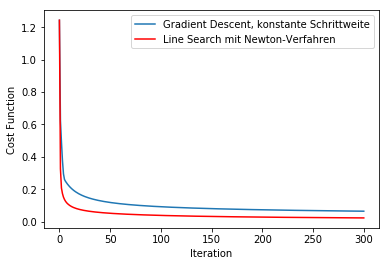

In [68]:
plt.plot( cost_fr )
plt.plot( cost_lsnw,'r' )
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.legend(['Gradient Descent, konstante Schrittweite','Line Search mit Newton-Verfahren'])

plt.show()

### Übung 3.3 : Line Search mit Backtracking (6)

Implementieren Sie nun Gradient Descent mit Line Search auf Basis des Backtracking.

Auch hier wird für Schritt 2.B. wird eine weitere Iterationsschlaufe durchlaufen:

1. Startwert setzen : $t_0$ (sollte ein nicht zu kleiner positiver Wert sein).
2. Wert der Kostenfunktion am Startpunkt berechnen: $C^{(0)} = C(\theta^{(k)})$
3. Iterationsschritt:
    1. Setze $C^{(j)} = C\left(\theta^{(k)} + t_j \cdot a^{(k+1)}\right)$
    2. Abbruchkriterium testen: 
        * $C^{(0)}-C^{(j)} \ge c \lVert a^{(k+1)} \rVert^2$; falls erfüllt, abbrechen und $t_j$ zurückgeben. 
        * Falls maximale Anzahl Iterationen erreicht, $t_{j}$ mit Warnung zurückgeben. 
    3. Update: $t_{j+1} = \tau\cdot t_j $

Die Parameter $\tau$ und $c$ erfüllen $0<c,\tau<1$. 

Implementieren Sie nun folgende Funktionen:
* Line Search mit Backtracking als Optimiserungsalgorithmus (innerer Loop): `line_search_backtracking(t_init, theta, a, X, y, c, tau, n_max)`; als Abbruch-Kriterium verwenden Sie 
* Gradient Descent mit Line Search (äusserer Loop): `gd_line_search_bt( X, y, theta_init, t_init, n_iter, c, tau, n_max)`

*Hinweis*: Um Code-Duplikation zu vermeiden, können Sie auch eine generische Funktion `gd_line_search` implementieren indem Sie die Implementierung von Line Search als Funktion übergeben und die spezifischen Parameter als Dictionary übergeben. 

In [56]:
eps = 1.0e-8

def line_search_backtracking(t_init, theta0, a, X, y, c, tau, n_max=100):
    """
    Returns the step size and a flag indicating whether the max iterations has been reached (false) or not (true).  
    
    Arguments:
    t_init -- initial value for t (Newton method)
    theta0 -- initial parameter vector (np.array with shape (n,))
    a -- descent direction (np.array with shape (n,))
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))   
    eps -- threshold for the norm of the gradient
    n_max -- max number of iterations

    Returns:
    step size -- size of the step in the direction a 
    flag - true if less than nmax iterations have been used to reach covergence
    """

    # EXERCISE START
    
    t = t_init
    C0 = cost( theta0, X, y )
    for j in range(n_max):
        Cj = cost( theta0 + t*a, X, y )
        
        if C0 - Cj >=  c*np.linalg.norm(a)**2:
            return t,True
        elif j == n_max-1:
            return t,False
        else:
            t = tau*t
    
        #print(f'\t\t k = {j:4d}\t Cj = {Cj:4.5f}\t t = {t:4.5f}\t C0 - Cj = {C0 - Cj:4.5f}\t c*np.linalg.norm(a) = {c*np.linalg.norm(a):4.5f}')
    return t,False
            

    # EXERCISE STOP    

In [57]:
def gd_line_search_backtracking( X, y, theta_init, t_init, n_iter, c, tau, n_max=100):
    """
    Arguments:
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    theta_init -- initial parameter vector (np.array with shape (n,))
    t_init -- initial value for t (Newton method)
    n_iter -- maximum number of gradient evaluations (int)
    eps -- threshold for |g'(t_j)| to stop the inner loop
    n_max -- maximal number of iterations in the inner loop
    
    Returns:
    theta -- the final parameter vector of the iteration (np.array with shape (n,))
    theta_history -- list with the parameter vectors of all the iterations (list with length n_iter+1)
    """

    # EXERCISE START
    # Initialisierung
    theta = theta_init
    theta_history = np.zeros((1,len(theta)))
    theta_history[0,:] = theta
    
    t = t_init
    # EXERCISE START
    for j in range(n_iter):
        a = -cost_gradient( theta, X, y )
        
        t,flag = line_search_backtracking(t_init, theta, a, X, y, c, tau, n_max=n_max)
        
        theta = theta + t*a
        print(f'iter = {j:4d}\t t = {t:4.5f}')
        
        theta_history = np.append(theta_history,[theta],axis=0)
    
    return theta,theta_history
    
    
    # EXERCISE STOP

### Übung 3.4 : Anwendung des Verfahrens (3)

* Wenden Sie nun Gradient Descent mit Line Search und Backtracking an. 
* Überlegen Sie sich und testen Sie, wie `t_init` gewählt werden soll.
* Überlegen Sie sich, wie die Parameter $c$ und $\tau$ gewählt werden sollen und testen Sie einige Möglichkeiten. Beschreiben Sie, wie sich die Wahl der Parameter auf die Performance des Algorithmus auswirkt und begründen Sie, weshalb Ihre Wahl der Parameter vernünftig ist.
* Plotten Sie dann die Kostenfunktion im Verlauf der Iterationen.

In [58]:
# Konstruktion des Initialwertes:
np.random.seed(0)
theta_init = np.random.rand( X.shape[1] ) * 0.1

# Gradient Descent Verfahren mit Line Search
# EXERCISE START
theta_lsbt, theta_history_lsbt = gd_line_search_backtracking( X, y, theta_init, t_init=20, n_iter=100, c=0.1, tau=0.9, n_max=100)

# EXERCISE STOP

iter =    0	 t = 1.16299
iter =    1	 t = 6.27621
iter =    2	 t = 1.16299
iter =    3	 t = 4.11782
iter =    4	 t = 1.43580
iter =    5	 t = 3.33544
iter =    6	 t = 1.59533
iter =    7	 t = 2.70170
iter =    8	 t = 1.96954
iter =    9	 t = 2.70170
iter =   10	 t = 2.18838
iter =   11	 t = 2.70170
iter =   12	 t = 2.18838
iter =   13	 t = 3.00189
iter =   14	 t = 2.43153
iter =   15	 t = 3.00189
iter =   16	 t = 2.43153
iter =   17	 t = 3.00189
iter =   18	 t = 2.70170
iter =   19	 t = 3.00189
iter =   20	 t = 2.70170
iter =   21	 t = 3.33544
iter =   22	 t = 3.00189
iter =   23	 t = 3.33544
iter =   24	 t = 3.00189
iter =   25	 t = 3.33544
iter =   26	 t = 3.00189
iter =   27	 t = 3.33544
iter =   28	 t = 3.33544
iter =   29	 t = 3.70604
iter =   30	 t = 3.33544
iter =   31	 t = 3.70604
iter =   32	 t = 3.33544
iter =   33	 t = 3.70604
iter =   34	 t = 3.33544
iter =   35	 t = 3.70604
iter =   36	 t = 3.70604
iter =   37	 t = 4.11782
iter =   38	 t = 3.70604
iter =   39	 t = 4.11782


In [59]:
# Graphische Darstellung der Kostenfunktion und Vergleich mit Gradient Descent mit konstanter Lernrate

# EXERCISE START
cost_lsbt = []
for theta in theta_history_lsbt:
    cost_lsbt.append(cost( theta, X, y ))

cost_lsbt


# EXERCISE STOP

[1.2427315929833518,
 0.7431465576785475,
 0.6139869788419265,
 0.4119596402710006,
 0.39795984484510316,
 0.32028675189220174,
 0.24814745632010268,
 0.20930060774561737,
 0.18559820179227268,
 0.17522612394136208,
 0.16455236680915264,
 0.15898071298534105,
 0.14976085877281753,
 0.14250401528197096,
 0.1408883942839579,
 0.13672566409967957,
 0.1336018131931529,
 0.12823840980085752,
 0.12477256737401748,
 0.12205164292897872,
 0.11829438008809089,
 0.11510435000219657,
 0.11386756404712747,
 0.11232039263075538,
 0.11053944746475308,
 0.10848509194978292,
 0.10630440464535713,
 0.10391857623963294,
 0.1017966762411161,
 0.10068279919483077,
 0.09992378786748116,
 0.09859113515882074,
 0.09754068055590218,
 0.09591517628861476,
 0.09462606748345374,
 0.0928609918075872,
 0.0915354606838566,
 0.09074564262832249,
 0.090433557780877,
 0.08952339491650013,
 0.08907494548820649,
 0.08794110161103028,
 0.08726316392593901,
 0.08592578255765869,
 0.08507288334370819,
 0.08367273165075592,

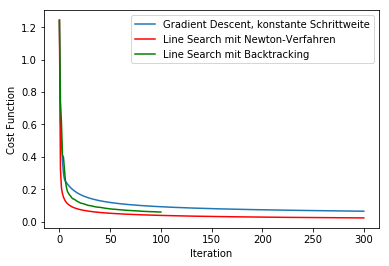

In [67]:
plt.plot( cost_fr)
plt.plot( cost_lsnw , 'r')
plt.plot( cost_lsbt , 'g')
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.legend(['Gradient Descent, konstante Schrittweite','Line Search mit Newton-Verfahren', 'Line Search mit Backtracking'])
plt.show()

### Übung 3.5 : Evaluation der Verfahren / Modelle (3)

Vergleichen Sie die verschiedenen Verfahren (fixed rate, line search mit newton und backtracking) und beschreiben Sie die Vor- und Nachteile.

Berechnen Sie schliesslich die Vorhersage der Modelle für die Samples der Testdaten (`Xtest, ytest`).

Als Vorhersage dafür, ob eine gegebenes Bild eine '1' enthält oder nicht verwenden Sie

$$
y_{\rm pred} = \left\{\begin{eqnarray}
1 & \qquad\left(\hat{y}(\theta, \mathbf{x})\ge 1/2\right)\\
0 & \qquad\left(\hat{y}(\theta, \mathbf{x})\lt 1/2\right)
\end{eqnarray} \right.
$$

Testen Sie nun, bei welchem Prozentsatz der Datenpunkte im Testset, die Vorhersage stimmt durch Vergleichen mit den Labelwerten $y$. Implementieren Sie hierfür die Funktion `accuracy(theta, X, y)` und wenden Sie sie auf die durch die Verfahren trainierten Parameter und die Testdaten an.

In [61]:
def accuracy(theta, X, y):
    """
    Arguments:
    theta -- parameter vector (np.array with shape (n,))
    X -- matrix of data points (np.array with shape (m,n))
    y -- vector of labels (np.array with shape (m,))
    
    Returns:
    accuracy -- rate of true predictions
    """
    
    # EXERCISE START
    row,col = X.shape
    
    ypred = np.zeros((len(y),))
    for i in range(len(X)):
        ypred[i] = yhat(theta,X[i,:])
    ypred[ypred>=0.5] = 1
    ypred[ypred<0.5] = 0
    accuracy = ypred == y
    return sum(accuracy)/len(y)
    
    # EXERCISE STOP

print("Fixed Rate: ", accuracy(theta_fr, Xtest, ytest))
print("Line Search NW: ", accuracy(theta_lsnw, Xtest, ytest))
print("Line Search BT: ", accuracy(theta_lsbt, Xtest, ytest))

Fixed Rate:  0.9556786703601108
Line Search NW:  0.9667590027700831
Line Search BT:  0.961218836565097


# Teil 4: Anwendung auf Use Case 'Katzenerkennung' (4 Punkte)

Als weitere Anwendung von Gradient Descent haben wir Ihnen zwei Datensets beigelegt, beide mit Bildern mit Katzen und ohne Katzen. Das erste ist das *Training-Set*, auf dem Sie ihre Funktion optimieren, das zweite ist das *Test-Set*, auf dem Sie den gefundenen optimalen Parametervektor $\boldsymbol{\theta}_0$ validieren können.

Der folgende Code lädt Ihnen die Datensets $(\mathbf{X}_\text{train}, \mathbf{y}_\text{train})$ und $(\mathbf{X}_\text{test}, \mathbf{y}_\text{test})$:

In [62]:
cat_nocat_data = np.load("cat_nocat_data.npz") # Datei sollte im gleichen Verzeichnis liegen
X_train = cat_nocat_data['X_train']
X_test = cat_nocat_data['X_test']
y_train = cat_nocat_data['y_train']
y_test = cat_nocat_data['y_test']
[X_train.shape, y_train.shape, X_test.shape, y_test.shape]

[(209, 12288), (209,), (50, 12288), (50,)]

Mit der folgenden Funktion können Sie einige der Bilder darstellen und genauer anschauen:

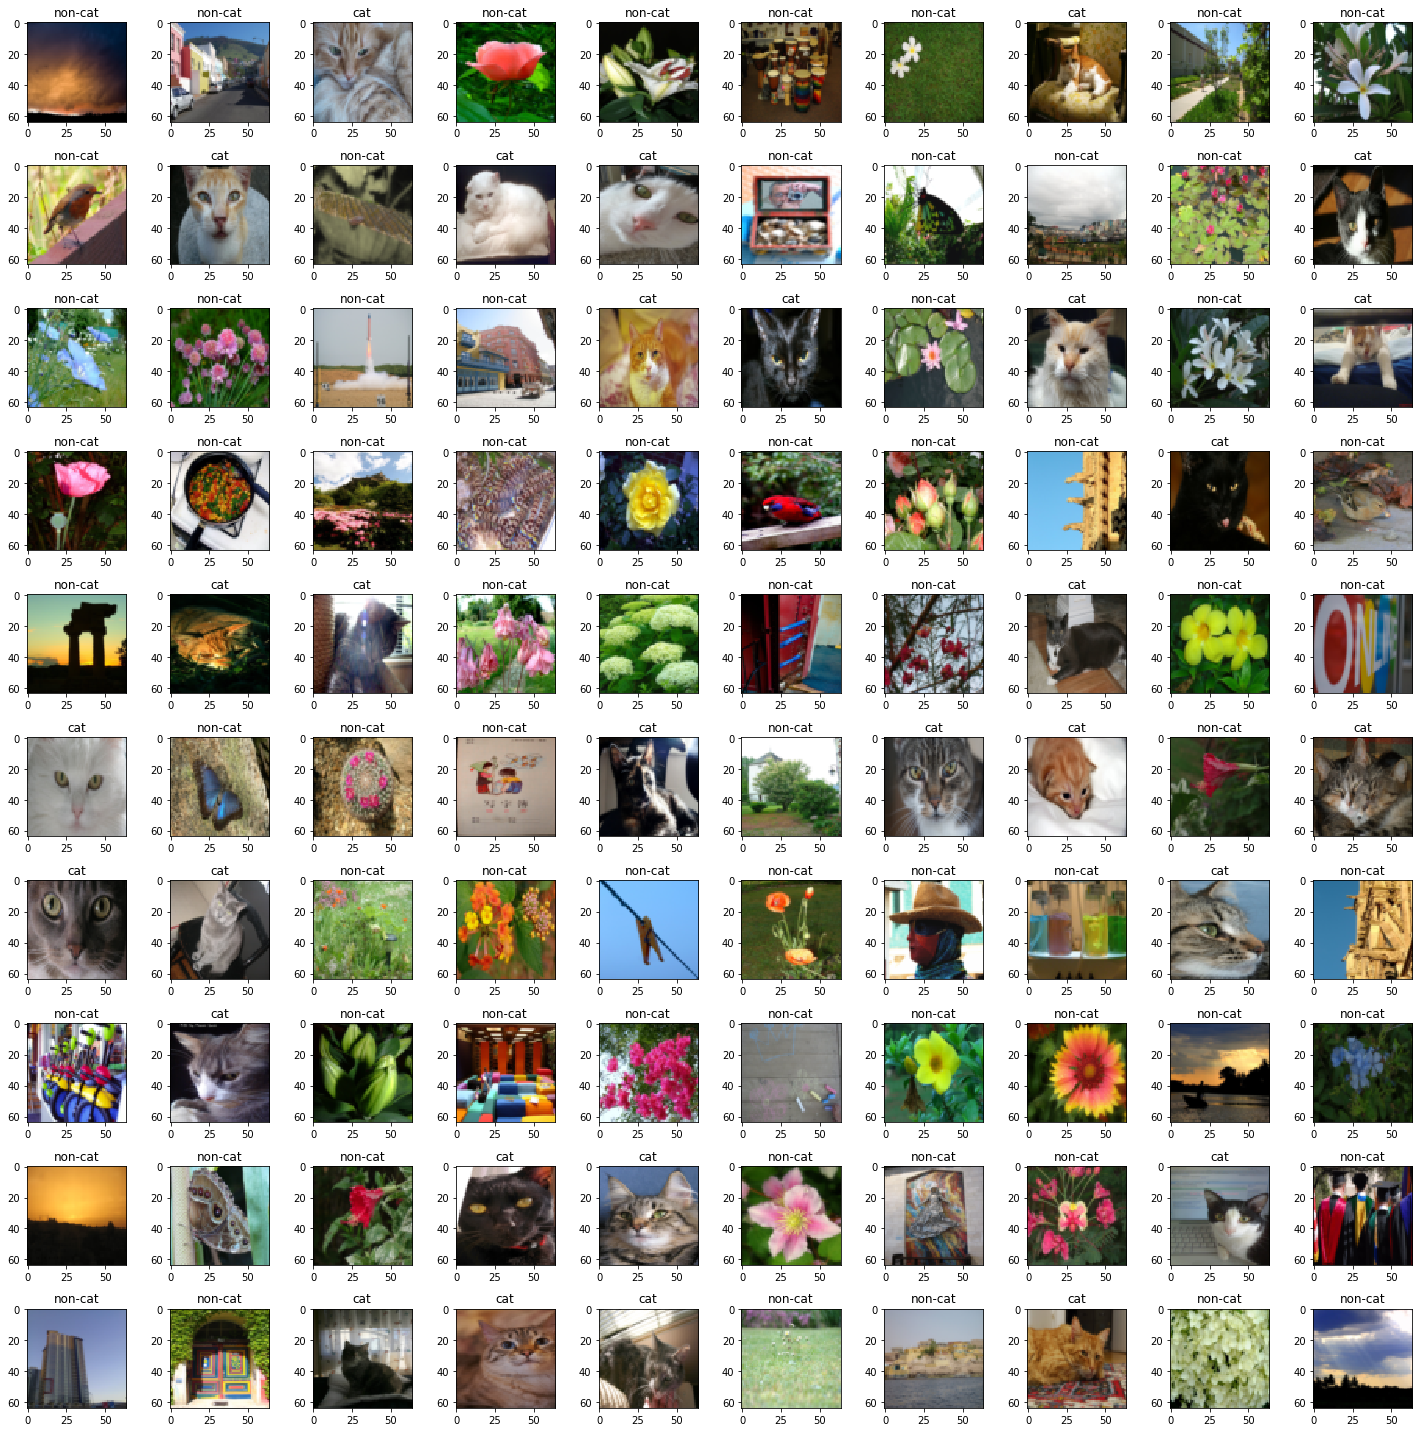

In [63]:
def plot_image( X, y ):
    plt.imshow( X.reshape(64,64,3) )
    title = 'cat' if y==1 else 'non-cat'
    plt.title( title )

plt.figure(figsize=(20,20))
for i in range(10):
    for j in range(10):
        plt.subplot2grid((10,10),(i,j))
        plot_image( X_train[10*i+j,:], y_train[10*i+j] )
plt.tight_layout()

### Übung 4.1 : Training des Katzenklassifikators (2)

(1) Wenden Sie das Gradient Descent Verfahren auf die Trainingsdaten an, d.h. trainieren Sie das Modell mit den Trainingsbildern und -labels (`X_train` und `y_train`). Initialisieren Sie geeignet die Parameterwerte und führen Sie maximal 1000 Iterationen mit fester Lernrate durch. 

(2) Plotten Sie auch hier wieder die Kostenfunktion gegenüber der Anzahl Iterationen fürs Trainings- und Test-Datenset.

In [64]:
np.random.seed(138)

# EXERCISE START
theta_init = np.random.rand( X_train.shape[1] ) * 0.008

# EXERCISE START
theta_fr, theta_history = gradient_descent( X_train, y_train, theta_init, n_iter = 1000, alpha=0.002 )

c_fr_train = []
c_fr_test = []
for theta in theta_history:
    c_fr_train.append(cost( theta, X_train, y_train ))
    c_fr_test.append(cost( theta, X_test, y_test ))
    

# EXERCISE STOP

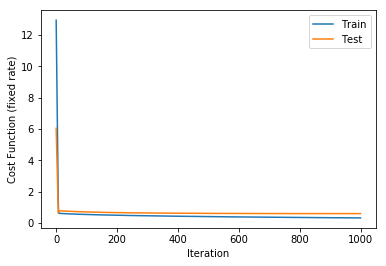

In [65]:
# Graphische Darstellung der Kostenfunktion für Trainings- und Test-Datenset.

# EXERCISE START

plt.plot(c_fr_train)
plt.plot(c_fr_test)
plt.xlabel('Iteration')
plt.ylabel('Cost Function (fixed rate)')
plt.legend(['Train','Test'])


# EXERCISE STOP

### Übung 4.2 : Testen der Güte des Klassifikators (2)

Berechnen Sie nun für die Bilder in den Trainings- (`X_train`) und den Test-Daten (`X_test`) die Vorhersage, ob sich eine Katze auf den Bildern befindet oder nicht - wiederum, indem Sie die oben implementierte `accuracy` Methode verwenden.

In [66]:
# EXERCISE START

print("Accuracy cat / non-cat preditions (train): ", accuracy(theta_fr, X_train, y_train))
print("Accuracy cat / non-cat preditions (test): ", accuracy(theta_fr, X_test, y_test))

# EXERCISE STOP

Accuracy cat / non-cat preditions (train):  0.9138755980861244
Accuracy cat / non-cat preditions (test):  0.72


## Evaluation der Verfahren/Modelle, Wichtigkeit der Parameter

### Fixe Schrittweite


Diese Methode ist einfach, aber die Wahl der richtigen Schrittweite ist schwer. Wählt man die Schritte zu klein, dauert es unter Umständen zu lange, wählt man sie hingegen zu gross, könnte es passieren, dass der Algorithmus über sein Ziel, das Minimun der Funktion zu erreichen, "hinausschiesst" und divergiert. 

### Line Search mit Newton

Diese Methode ist normaleweise sehr schnell. Und wenn man einen guten Startpunkt wählt äusserst effektiv. Aber es ist nicht gewährleistet, dass man ein globales Minimum von allen Startpunkten erreichen kann.

### Line Search mit Backtracking

Die Backtracking Methode ist sehr einfach und sehr effektiv. Sie beginnt mit der Einheitsschrittgrösse und verringert sie dann um die bis zur Stoppbedingung in eine Abstiegsrichtung. 
Diese Methode verhindert, dass der Schritt zu klein wird, verhindert jedoch nicht Schritte, die relativ zu der Abnahme der Funktion zu lang sind.


### Wichtigkeit der Hyperparameter

Durch das wiederholte Trainieren/Testen und dabei die Veränderung der relevanten Parameter kann man eine optimale Accuracy erziehlen. Dadurch ist mir wie oben gezeigt, selbst mit einem sehr einfachen Modell eine Accuray von 72% zu erziehlen. 